<a href="https://colab.research.google.com/github/LinusTC/MLP-CW3/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cotton Leaf Disease Classification

In [6]:
'''! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle\ API/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json'''

"! pip install kaggle\nfrom google.colab import drive\ndrive.mount('/content/drive')\n! mkdir ~/.kaggle\n!cp /content/drive/MyDrive/Kaggle\\ API/kaggle.json ~/.kaggle/kaggle.json\n! chmod 600 ~/.kaggle/kaggle.json"

### 1.0 Imports

In [7]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

### 1.1 Kaggle Imports

In [8]:
'''import kaggle
import kagglehub

# Download latest version
path = "/kaggle/input/cotton-leaf-disease-dataset/cotton"

print("Path to dataset files:", path)'''

'import kaggle\nimport kagglehub\n\n# Download latest version\npath = "/kaggle/input/cotton-leaf-disease-dataset/cotton"\n\nprint("Path to dataset files:", path)'

In [9]:
'''import os
print(os.listdir("Cotton Plant Images"))'''
path = "/kaggle/input/cotton-leaf-disease-dataset/cotton"

### 2. Load Data

In [10]:
transform = transforms.Compose([
    transforms.Resize(384),
    transforms.CenterCrop(350),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(path, transform=transform)

train_size = len(dataset) // 2
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # No shuffle for testing

labels_map = {
    0: "bacterial_blight",
    1: "curl_virus",
    2: "fussarium_wilt",
    3: "healthy",
}

image, label = train_dataset[0]
image.size()

torch.Size([3, 350, 350])

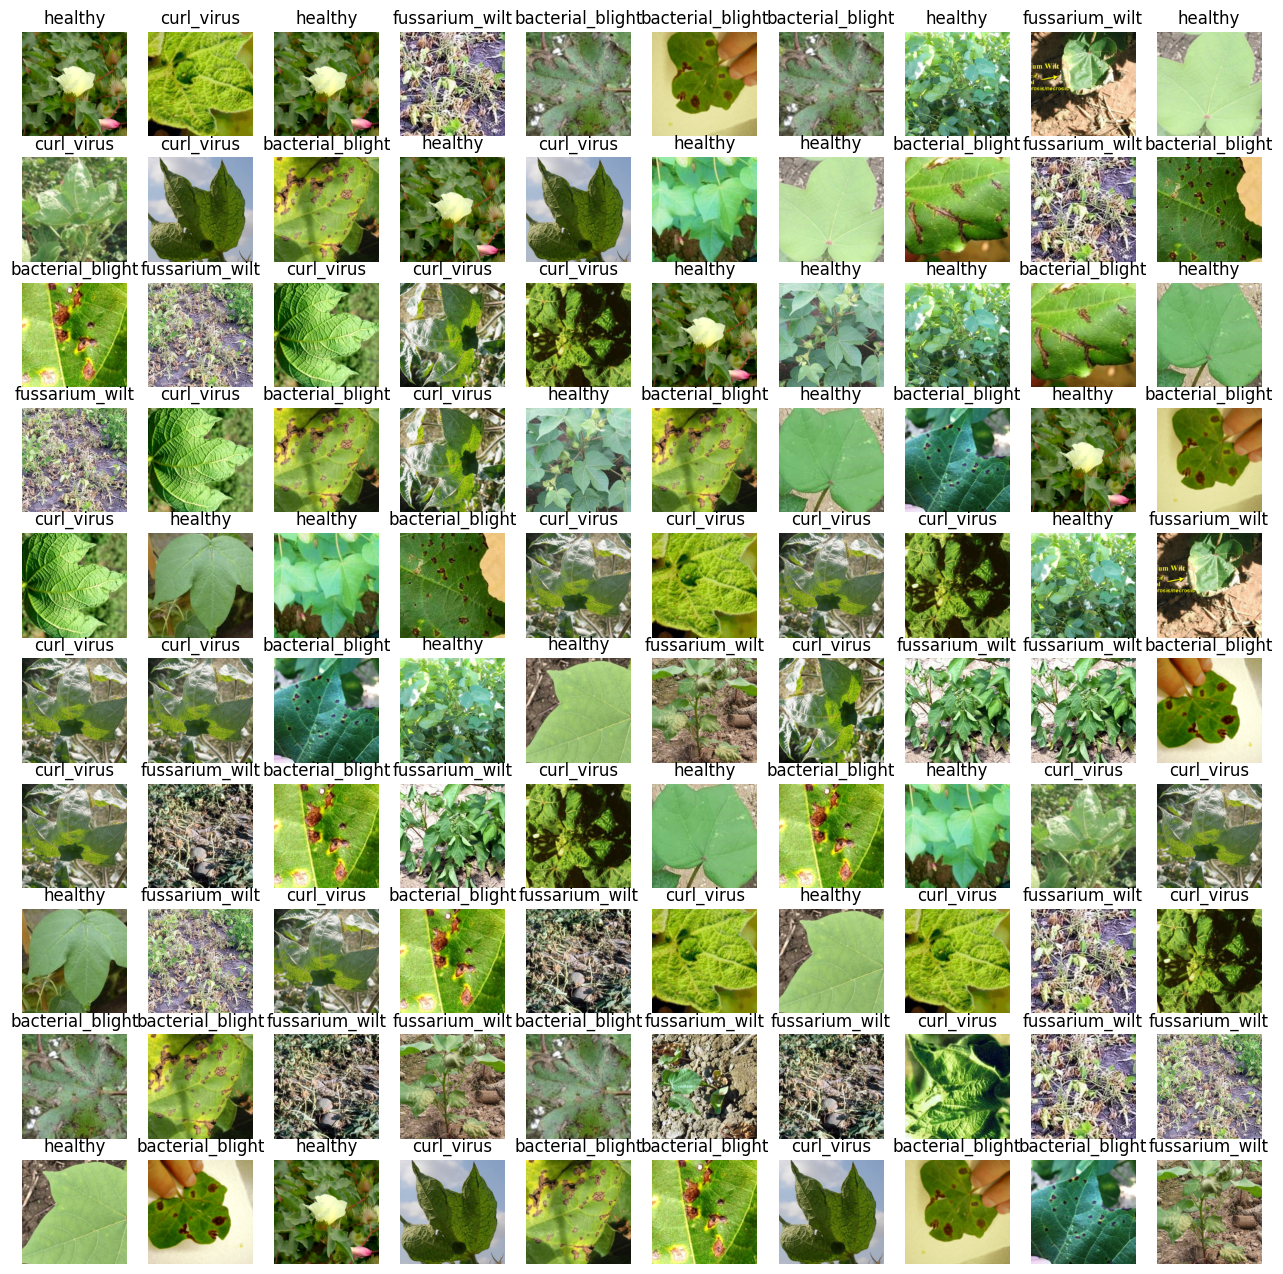

In [11]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Display Sample Images
figure = plt.figure(figsize=(16, 16))
cols, rows = 10, 10

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")

    img = img.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C) for display
    plt.imshow(img)

plt.show()


### 3. Object Detection Leaf/Plant

In [12]:
# Nats Code



## 4. Image Classification

### 4.1 Base Model

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork (nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 7) #(32, 344, 344)
        self.pool = nn.MaxPool2d (2, 2) #(32, 172, 172)
        self.conv2 = nn.Conv2d(32, 64, 7) #(64, 166, 166) #(64, 83, 83)
        self.conv3 = nn.Conv2d (64, 128, 7) # Output: (256, 76, 76) #(128, 38, 38)
        self.conv4 = nn.Conv2d(128, 256, 7) #(256, 32, 32) #(256, 16, 16)

        self.fc1 = nn.Linear(256 * 16 * 16, 8192)
        self.fc2 = nn.Linear(8192, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [14]:
training_net = NeuralNetwork()

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(training_net.parameters(), lr=0.001)

In [15]:
import torch
from tqdm import tqdm

num_epochs = 50

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
training_net.to(device)

for epoch in range(num_epochs):
    loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)

    running_loss = 0.0
    for i, data in loop:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = training_net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss/len(train_loader):.6f}")

loop.close()


Epoch [1/50] Loss: 1.385707


Epoch [2/50] Loss: 1.385668


Epoch [3/50] Loss: 1.385605


Epoch [4/50] Loss: 1.385647


Epoch [5/50] Loss: 1.385600


Epoch [6/50] Loss: 1.385592


Epoch [7/50] Loss: 1.385462


Epoch [8/50] Loss: 1.385484


Epoch [9/50] Loss: 1.385466


Epoch [10/50] Loss: 1.385389


Epoch [11/50] Loss: 1.385343


Epoch [12/50] Loss: 1.385304


Epoch [13/50] Loss: 1.385415


Epoch [14/50] Loss: 1.385411


Epoch [15/50] Loss: 1.385301


Epoch [16/50] Loss: 1.385245


Epoch [17/50] Loss: 1.385306


Epoch [18/50] Loss: 1.385205


Epoch [19/50] Loss: 1.385192


Epoch [20/50] Loss: 1.385248


Epoch [21/50] Loss: 1.385094


Epoch [22/50] Loss: 1.385169


Epoch [23/50] Loss: 1.385155


Epoch [24/50] Loss: 1.385038


Epoch [25/50] Loss: 1.385027


Epoch [26/50] Loss: 1.385190


Epoch [27/50] Loss: 1.385023


Epoch [28/50] Loss: 1.385082


Epoch [29/50] Loss: 1.384999


Epoch [30/50] Loss: 1.385091


Epoch [31/50] Loss: 1.384995


Epoch [32/50] Loss: 1.385016


Epoch [33/50] Loss: 1.384879


Epoch [34/50] Loss: 1.384996


Epoch [35/50] Loss: 1.384870


Epoch [36/50] Loss: 1.384873


Epoch [37/50] Loss: 1.384849


Epoch [38/50] Loss: 1.384850


Epoch [39/50] Loss: 1.384835


Epoch [40/50] Loss: 1.384987


Epoch [41/50] Loss: 1.384872


Epoch [42/50] Loss: 1.384726


Epoch [43/50] Loss: 1.384749


Epoch [44/50] Loss: 1.384657


Epoch [45/50] Loss: 1.384799


Epoch [46/50] Loss: 1.384845


Epoch [47/50] Loss: 1.384636


Epoch [48/50] Loss: 1.384694


Epoch [49/50] Loss: 1.384694


Epoch [50/50] Loss: 1.384656


In [16]:
torch.save(training_net.state_dict(), 'trained_net.pth')

In [17]:
test_net = NeuralNetwork()

test_net.load_state_dict(torch.load('trained_net.pth'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_net.to(device)

test_net.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)

        outputs = test_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')


<ipython-input-17-3616af546651>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_net.load_state_dict(torch.load('trained_net.pth'))
Testing: 100%|██████████| 27/27 [00:

Accuracy of the network on the test images: 25.38%


### 4.2 VGG16 Model

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=4):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(10*10*512, 4096),  # Adjusted from 7*7*512 to 10*10*512
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [7]:
num_classes = 4
num_epochs = 100
batch_size = 32
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VGG16(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

In [8]:
total_step = len(train_loader)
# training loop
for epoch in range(num_epochs):
    train_loop = tqdm(enumerate(train_loader), total=total_step, desc=f'Epoch {epoch+1}/{num_epochs}')
    for i, (images, labels) in train_loop:  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm loop display
        train_loop.set_postfix(loss=loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        validation_loop = tqdm(test_loader, desc='Validating')
        for images, labels in validation_loop:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs
    
    accuracy = 100 * correct / total
    print('Accuracy of the network on the {} validation images: {:.2f} %'.format(total, accuracy))
    model.train()


Validating: 100%|██████████| 27/27 [00:17<00:00,  1.53it/s]


Accuracy of the network on the 855 validation images: 24.21 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 55.32 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 78.13 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 84.68 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 71.11 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 90.29 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 86.08 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 82.57 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 89.24 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 90.99 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 91.35 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 89.24 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 87.25 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 92.16 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 92.63 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 93.45 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.05it/s]


Accuracy of the network on the 855 validation images: 95.32 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 96.26 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.26 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 92.51 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.05it/s]


Accuracy of the network on the 855 validation images: 95.44 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 97.08 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.61 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.05it/s]


Accuracy of the network on the 855 validation images: 96.84 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 97.54 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 93.22 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 95.56 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 93.80 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 95.09 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 96.96 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 96.96 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 97.66 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.05it/s]


Accuracy of the network on the 855 validation images: 96.84 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 96.14 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 97.54 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.14it/s]


Accuracy of the network on the 855 validation images: 95.56 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 97.08 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.04it/s]


Accuracy of the network on the 855 validation images: 97.31 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 97.31 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 97.54 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 95.56 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 95.79 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.84 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 97.54 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 97.66 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 96.84 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.05it/s]


Accuracy of the network on the 855 validation images: 90.99 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 96.96 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.49 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]


Accuracy of the network on the 855 validation images: 94.85 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 94.97 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.13it/s]


Accuracy of the network on the 855 validation images: 94.04 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 93.68 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 94.74 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 93.10 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 92.63 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 92.28 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 93.33 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]


Accuracy of the network on the 855 validation images: 96.02 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.13it/s]


Accuracy of the network on the 855 validation images: 96.14 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 96.02 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 92.98 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.26 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 96.14 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.14 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 96.37 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]


Accuracy of the network on the 855 validation images: 96.14 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.37 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.61 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.61 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.84 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 96.96 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 97.19 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 97.08 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 95.56 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 94.62 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.37 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 97.08 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]


Accuracy of the network on the 855 validation images: 96.61 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


Accuracy of the network on the 855 validation images: 95.91 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 97.08 %


Validating: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


Accuracy of the network on the 855 validation images: 96.26 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 96.73 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


Accuracy of the network on the 855 validation images: 97.08 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]


Accuracy of the network on the 855 validation images: 96.49 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


Accuracy of the network on the 855 validation images: 96.37 %


Validating: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]

Accuracy of the network on the 855 validation images: 95.67 %


In [11]:
torch.save(model.state_dict(), 'vgg16_model.pth')

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VGG16(num_classes).to(device)

model.load_state_dict(torch.load('vgg16_model.pth', map_location=device, weights_only=True))
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs

print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))   

100%|██████████| 27/27 [00:12<00:00,  2.10it/s]

Accuracy of the network on the test images: 96.14035087719299 %
